### Insurance dataset - linear regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__

'1.2.1'

##### Data preparation

In [2]:
raw_df = pd.read_csv(r'/content/insurance.csv')
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df = raw_df.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
categorical_cols = [column for column in df.columns if df[column].dtype == 'object']
categorical_cols

['sex', 'smoker', 'region']

In [9]:
for column in categorical_cols:
  df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


<ipython-input-9-04749b4d5bf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('category')


In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.describe(include=['category'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Some graphs

In [13]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

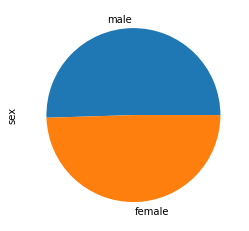

In [14]:
df['sex'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

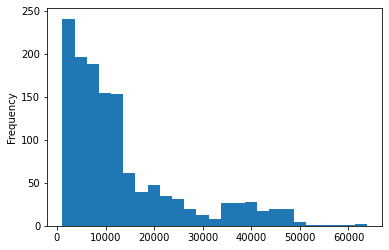

In [15]:
df['charges'].plot(kind='hist', bins=25)

In [16]:
import plotly.express as px
px.histogram(df, x = 'charges', facet_row= 'sex', facet_col = 'region')

In [17]:
px.histogram(df, x='smoker', facet_col='sex', color='sex')

In [18]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [19]:
correlation = df_dummies.corr()
correlation

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


In [20]:
fig = px.imshow(correlation, color_continuous_scale='RdBu_r')
fig.show()

In [21]:
correlation['charges'].sort_values(ascending=False)

charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64

##### Data division

In [22]:
X = df_dummies.copy()
X

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [23]:
y = X.pop('charges')
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [24]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape) 

X_train shape:  (1069, 8)
y_train shape:  (1069,)
X_test shape:  (268, 8)
y_test shape:  (268,)


##### Training

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
     

LinearRegression()

In [28]:
print('R2 Score: ', regressor.score(X_test, y_test))

R2 Score:  0.7749174882126446


In [29]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([ 4124.58129452, 37204.6645074 ,  8550.71394809,  2025.25367899,
       34988.79333099,  9557.46043353, 14214.59960459, 10613.31625949,
        9482.15578002,  4889.59166112])

In [30]:
predictions = pd.DataFrame(data={
    'y_true': y_test,
    'y_pred': y_pred
    })

predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions

,y_true,y_pred,error
1097,1674.63230,4124.581295,-2449.948995
1337,29141.36030,37204.664507,-8063.304207
934,4673.39220,8550.713948,-3877.321748
808,1131.50660,2025.253679,-893.747079
488,48885.13561,34988.793331,13896.342279
...,...,...,...
1323,43896.37630,36119.897304,7776.478996
395,7526.70645,6555.050506,971.655944
439,2897.32350,4666.637738,-1769.314238
669,6500.23590,8017.499564,-1517.263664


In [31]:
fig = px.histogram(predictions, x="error")
fig.show()

In [32]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

print('MAX: ', max_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAX:  24546.818310507042
MAE:  4286.784163182168
MSE:  38942949.8136145


In [33]:
regressor.intercept_

-10561.506104639593

In [34]:
regressor.coef_

array([  246.468175  ,   306.73689134,   457.73905207,  -213.43015702,
       23912.58076567,   -97.81025959,  -881.28711415, -1059.21500058])

##### Backward elimination

In [35]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

array([[ 1.   , 28.   , 23.98 , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 46.   , 38.17 , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 60.   , 28.595, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 52.   , 24.13 , ...,  1.   ,  0.   ,  0.   ],
       [ 1.   , 18.   , 38.28 , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 21.   , 25.8  , ...,  0.   ,  0.   ,  1.   ]])

In [36]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     381.0
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.67e-305
Time:                        09:30:35   Log-Likelihood:                -10817.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1060   BIC:                         2.170e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.056e+04   1099.351  

In [37]:
# deleting column with highest "P>|t|" value and check again
# if there is still column with "P>|t|" higher than 0.01 (for example), delete it and repeat all operation

In [38]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 6, 7, 8]]
predictors.remove('sex_male')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     435.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          9.08e-307
Time:                        09:30:35   Log-Likelihood:                -10817.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1061   BIC:                         2.169e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.065e+04   1088.491  

In [39]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 7, 8]]
predictors.remove('region_northwest')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.92e-308
Time:                        09:30:35   Log-Likelihood:                -10817.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1062   BIC:                         2.168e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.069e+04   1056.552  

In [40]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 7]]
predictors.remove('region_southwest')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     607.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.76e-308
Time:                        09:30:35   Log-Likelihood:                -10820.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1063   BIC:                         2.168e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.088e+04   1055.126  

In [41]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5]]
predictors.remove('region_southeast')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors)) 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     758.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.04e-309
Time:                        09:30:35   Log-Likelihood:                -10820.
No. Observations:                1069   AIC:                         2.165e+04
Df Residuals:                    1064   BIC:                         2.168e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.074e+04   1046.971    -10.261      0.0